In [1]:
using Revise
using TransportBasedInference
using HierarchicalDA
using LinearAlgebra
using OrdinaryDiffEq
using Trixi
using FFTW
using DifferentialEquations
using Distributions
using Statistics
using SparseArrays
using LinearMaps

Precompiling HierarchicalDA
        Info Given HierarchicalDA was explicitly requested, output will be shown live 
ERROR: LoadError: UndefVarError: `HLocEnKF` not defined
Stacktrace:
 [1] top-level scope
   @ ~/Documents/HierarchicalDA.jl/src/update_x/update_x_hierarchical_enkf_separate.jl:3
 [2] include(mod::Module, _path::String)
   @ Base ./Base.jl:495
 [3] include(x::String)
   @ HierarchicalDA ~/Documents/HierarchicalDA.jl/src/HierarchicalDA.jl:1
 [4] top-level scope
   @ ~/Documents/HierarchicalDA.jl/src/HierarchicalDA.jl:58
 [5] include
   @ Base ./Base.jl:495 [inlined]
 [6] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::Nothing)
   @ Base ./loading.jl:2216
 [7] top-level scope
   @ stdin:3
in expression starting at /Users/mathieu/Documents/HierarchicalDA.jl/src/update_x/update_x_hierarchical_enkf_separate.jl:3
in expression s

LoadError: The following 1 direct dependency failed to precompile:

HierarchicalDA [b59f95bf-30b4-47d7-8452-ad9e2f5bb16b]

Failed to precompile HierarchicalDA [b59f95bf-30b4-47d7-8452-ad9e2f5bb16b] to "/Users/mathieu/.julia/compiled/v1.10/HierarchicalDA/jl_oGCoQp".
[91m[1mERROR: [22m[39mLoadError: UndefVarError: `HLocEnKF` not defined
Stacktrace:
 [1] top-level scope
[90m   @[39m [90m~/Documents/HierarchicalDA.jl/src/update_x/[39m[90m[4mupdate_x_hierarchical_enkf_separate.jl:3[24m[39m
 [2] [0m[1minclude[22m[0m[1m([22m[90mmod[39m::[0mModule, [90m_path[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m./[39m[90m[4mBase.jl:495[24m[39m
 [3] [0m[1minclude[22m[0m[1m([22m[90mx[39m::[0mString[0m[1m)[22m
[90m   @[39m [35mHierarchicalDA[39m [90m~/Documents/HierarchicalDA.jl/src/[39m[90m[4mHierarchicalDA.jl:1[24m[39m
 [4] top-level scope
[90m   @[39m [90m~/Documents/HierarchicalDA.jl/src/[39m[90m[4mHierarchicalDA.jl:58[24m[39m
 [5] [0m[1minclude[22m
[90m   @[39m [90mBase[39m [90m./[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [6] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m./[39m[90m[4mloading.jl:2216[24m[39m
 [7] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at /Users/mathieu/Documents/HierarchicalDA.jl/src/update_x/update_x_hierarchical_enkf_separate.jl:3
in expression starting at /Users/mathieu/Documents/HierarchicalDA.jl/src/HierarchicalDA.jl:1
in expression starting at stdin:

In [2]:
using CairoMakie
using LaTeXStrings
# using Plots

In [3]:
polydeg = 3
Ncells = 100

Nx = (polydeg+1)*Ncells
Δ = 20
Ny = ceil(Int64, Nx/Δ)

# Define Trixi system for inviscid Burgers equation
sys_burgers = setup_burgers(polydeg, Ncells);

xgrid = vec(sys_burgers.mesh.md.xq);

LoadError: UndefVarError: `setup_burgers` not defined

Define polynomial annihilator operator

In [4]:
order_PA = 2

Ns = Nx - 2*ceil(Int64, order_PA/2)

PA = PolyAnnil(xgrid, order_PA; istruncated = true)

@assert size(PA.P) == (Ns, Nx)

S = LinearMaps.FunctionMap{Float64,true}((s,x)->mul!(s, PA.P, x), (x,s)->mul!(x, PA.P', s),
Ns, Nx; issymmetric=false, isposdef=false)

xs = xgrid[ceil(Int64, order_PA/2)+1:end-ceil(Int64, order_PA/2)]

LoadError: UndefVarError: `PolyAnnil` not defined

Define the time steps $\Delta t_{dyn}, \Delta t_{obs}$  of the dynamical and observation models. Observations from the truth are assimilated every $\Delta t_{obs}$.

In [215]:
Δtdyn = 0.01
Δtobs = 0.01

0.01

Define the time span of interest

In [216]:
t0 = 0.0
Tf = 100
Tspin = 1000
tf = t0 + Tf*Δtobs

1.0

 Define the distribution for the initial condition $\pi_{\mathsf{X}_0}$

In [217]:
π0 = MvNormal(zeros(Nx), Matrix(1.0*I, Nx, Nx))

FullNormal(
dim: 400
μ: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Σ: [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0]
)


In [218]:
σx_true = 0.01#Δtobs*1.0
σx = 0.01#copy(σx_true)
@show σx


σy = 0.2

ϵx_true = AdditiveInflation(Nx, zeros(Nx), σx_true)
ϵx = AdditiveInflation(Nx, zeros(Nx), σx)

ϵy = AdditiveInflation(Ny, zeros(Ny), σy)

σx = 0.01


AdditiveInflation(20, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.04000000000000001 0.0 … 0.0 0.0; 0.0 0.04000000000000001 … 0.0 0.0; … ; 0.0 0.0 … 0.04000000000000001 0.0; 0.0 0.0 … 0.0 0.04000000000000001], [0.2 0.0 … 0.0 0.0; 0.0 0.2 … 0.0 0.0; … ; 0.0 0.0 … 0.2 0.0; 0.0 0.0 … 0.0 0.2])

Setup system for inviscid Burgers equation

In [219]:
h(x, t) = x[1:Δ:end]
H = LinearMap(sparse(Matrix(1.0*I, Nx, Nx)[1:Δ:end,:]))
F = StateSpace(x->x, h)

StateSpace(var"#19#20"(), TransportBasedInference.var"#27#28"(), h)

Define ObsConstraintSystem

In [220]:
model = Model(Nx, Ny, Δtdyn, Δtobs, ϵx_true, ϵy, π0, 0, 0, 0, F);

In [221]:
# Define function class for the initial condition
αk = 0.7
f0 = SmoothPeriodic(xgrid, αk; L = 2.0)

SmoothPeriodic(400, 2.0, 0.7, ComplexF64[0.5908780674091665 + 0.23348266301773174im, 0.3737134090530332 - 0.7449566662104791im, -0.3920177531319306 - 0.4343138780229997im, -0.17900364826166254 - 0.08030203472982442im, 0.39731846439464213 + 0.008636204558766084im, -0.19570788010184795 - 0.019655353895525342im, 0.0863954888684721 - 0.04180870435602194im, -0.005208217445142683 - 0.1388598746550701im, -0.03750316869100972 - 0.1557263858424321im, -0.06779891261649595 - 0.048034083601015846im  …  4.074363039818191e-15 - 9.127752889839631e-15im, -7.45837843828439e-16 + 7.368683374620904e-16im, 1.784775991138189e-15 - 2.3578097703986252e-15im, 4.961674262309175e-15 - 1.6821853972614143e-14im, -2.370717084138316e-15 - 6.5974252694454265e-15im, -8.030796363029238e-17 - 2.913585947063494e-15im, 2.9229292812097834e-15 - 3.051554440702794e-15im, 2.6535163119297755e-15 + 6.910150868461218e-16im, -9.348805757348983e-16 + 9.189916792987766e-15im, -2.0596946005296366e-15 - 1.929692055626195e-15im])

In [262]:
x0 = vec(1/4 .+ 0.5*sin.(π*sys_burgers.mesh.md.xq));
# x0 = f0.(xgrid);

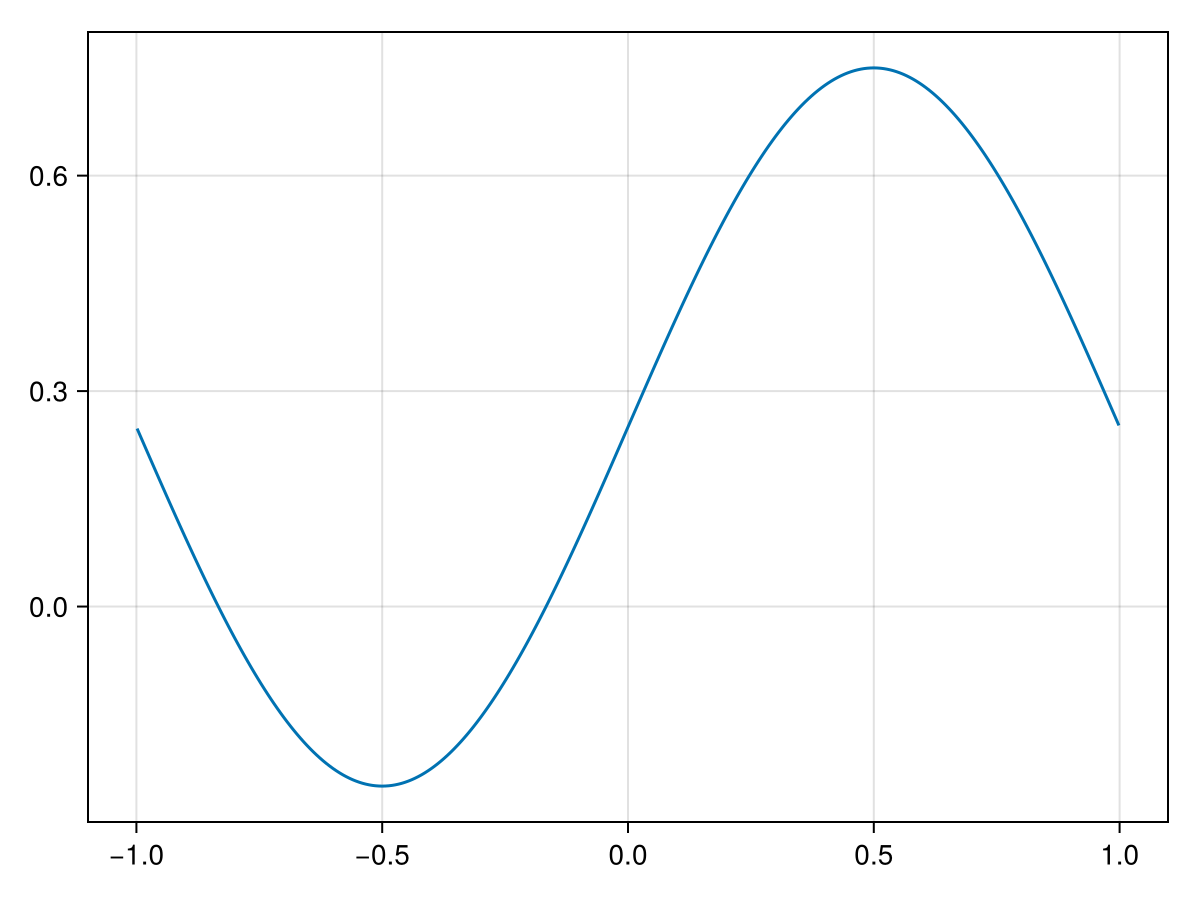

In [263]:
lines(xgrid, x0)

In [264]:
@time data = generate_data_trixi(model, x0, Tf, sys_burgers)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


  0.251974 seconds (382.71 k allocations: 53.399 MiB)


SyntheticData([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1  …  0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0], 0.01, [0.24781874120211922, 0.23963318937289718, 0.2289578432001476, 0.2207819935690501, 0.21642808440524178, 0.20826513501134114, 0.19763191955283363, 0.18949803846316532, 0.18516992062166754, 0.17706178909504916  …  0.3229382109049506, 0.314830079378332, 0.3105019615368347, 0.3023680804471668, 0.2917348649886584, 0.2835719155947578, 0.2792180064309499, 0.2710421567998526, 0.2603668106271026, 0.25218125879788034], [0.2626173164542968 0.25825926911940794 … 0.6183619330190243 0.6471279000268861; 0.255840007726317 0.2637893366908363 … 0.662932325914464 0.6171155573608103; … ; 0.2546476772716376 0.28989597258797645 … 0.6385788786202268 0.6302481150252779; 0.2572896944824134 0.24026828236326733 … 0.5992594538290477 0.6433743377094164], [0.5406017284040002 -0.002681173586185026 … 0.8604931119717655 0.6054550926178797; 0.56043669

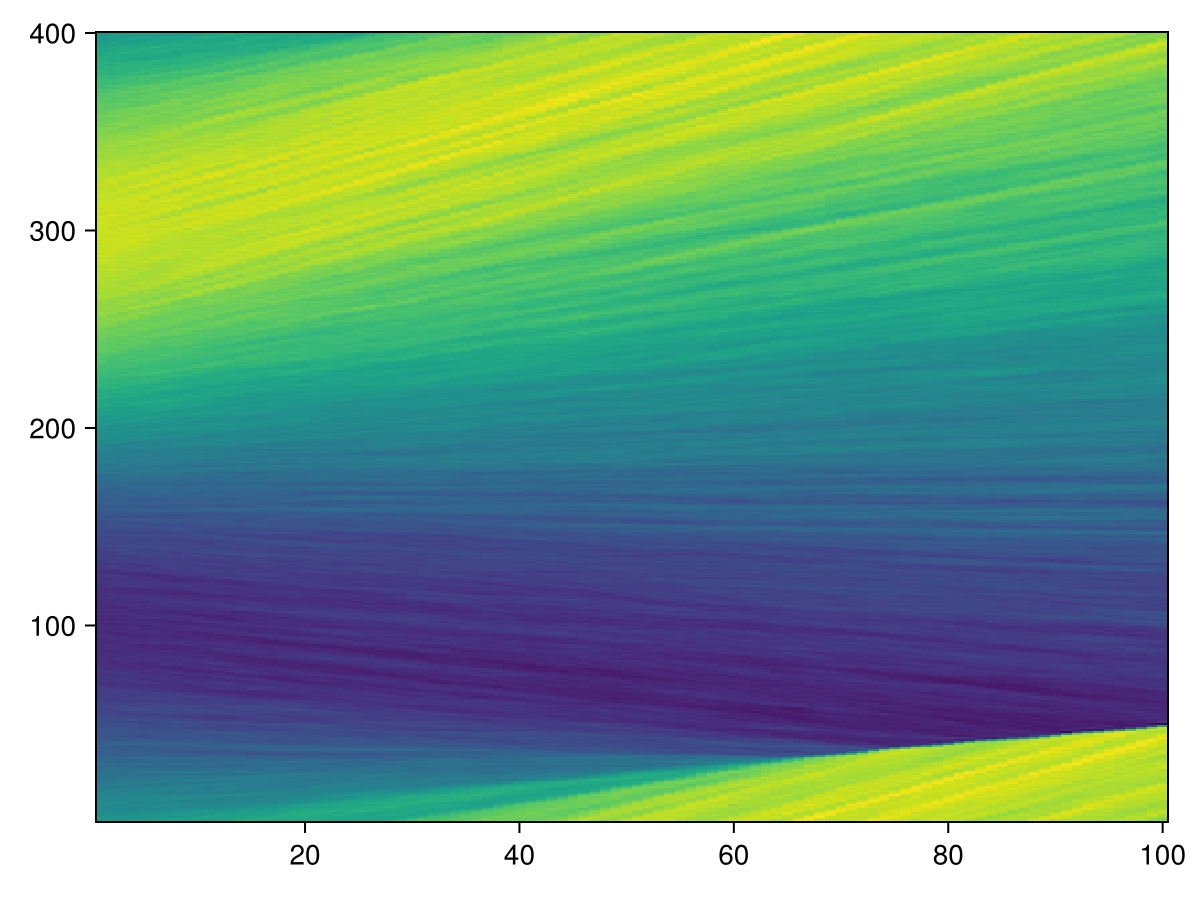

In [265]:
heatmap(data.xt[:, 1:end]')

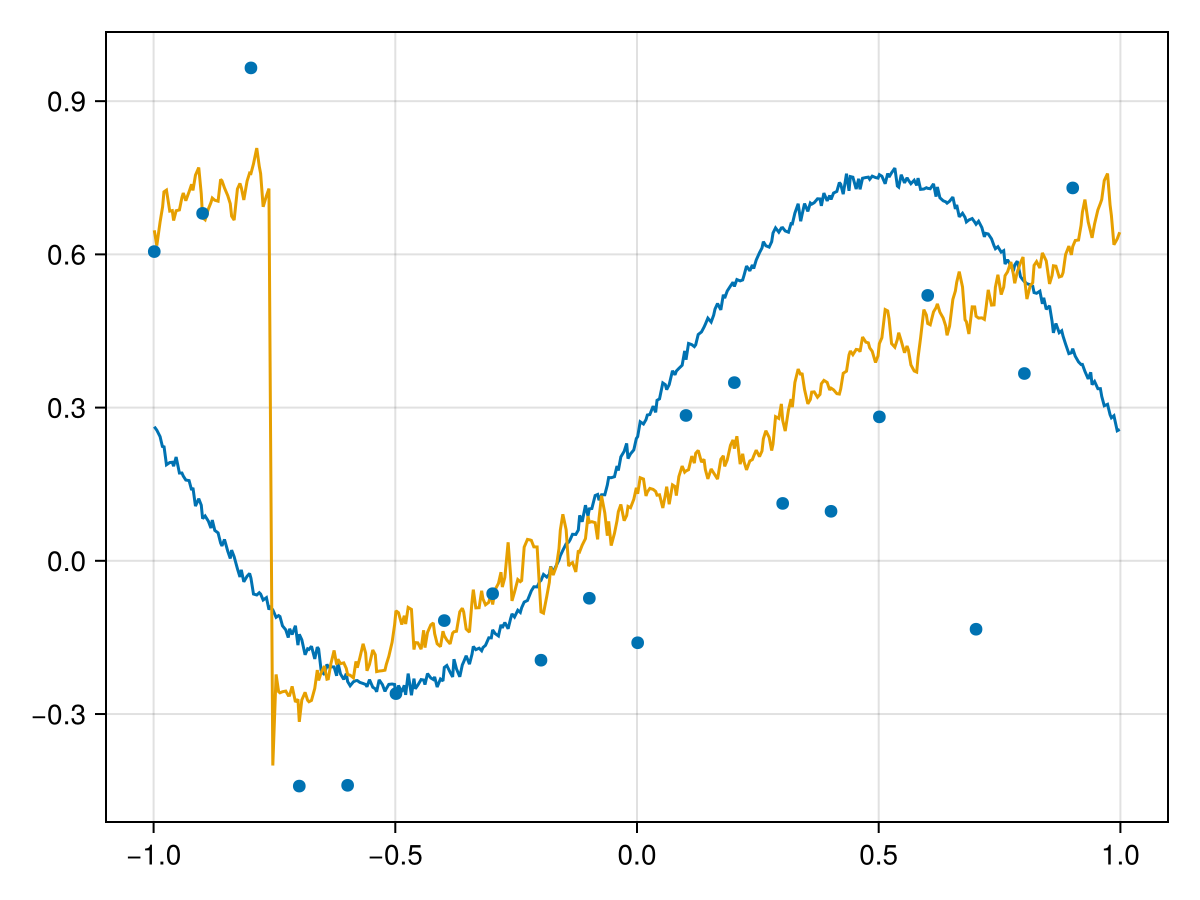

In [266]:
fig = Figure()
ax = Axis(fig[1,1])

lines!(ax, xgrid, data.xt[:,1])
lines!(ax, xgrid, data.xt[:,100])
scatter!(ax, xgrid[1:Δ:end], data.yt[:,100])

fig

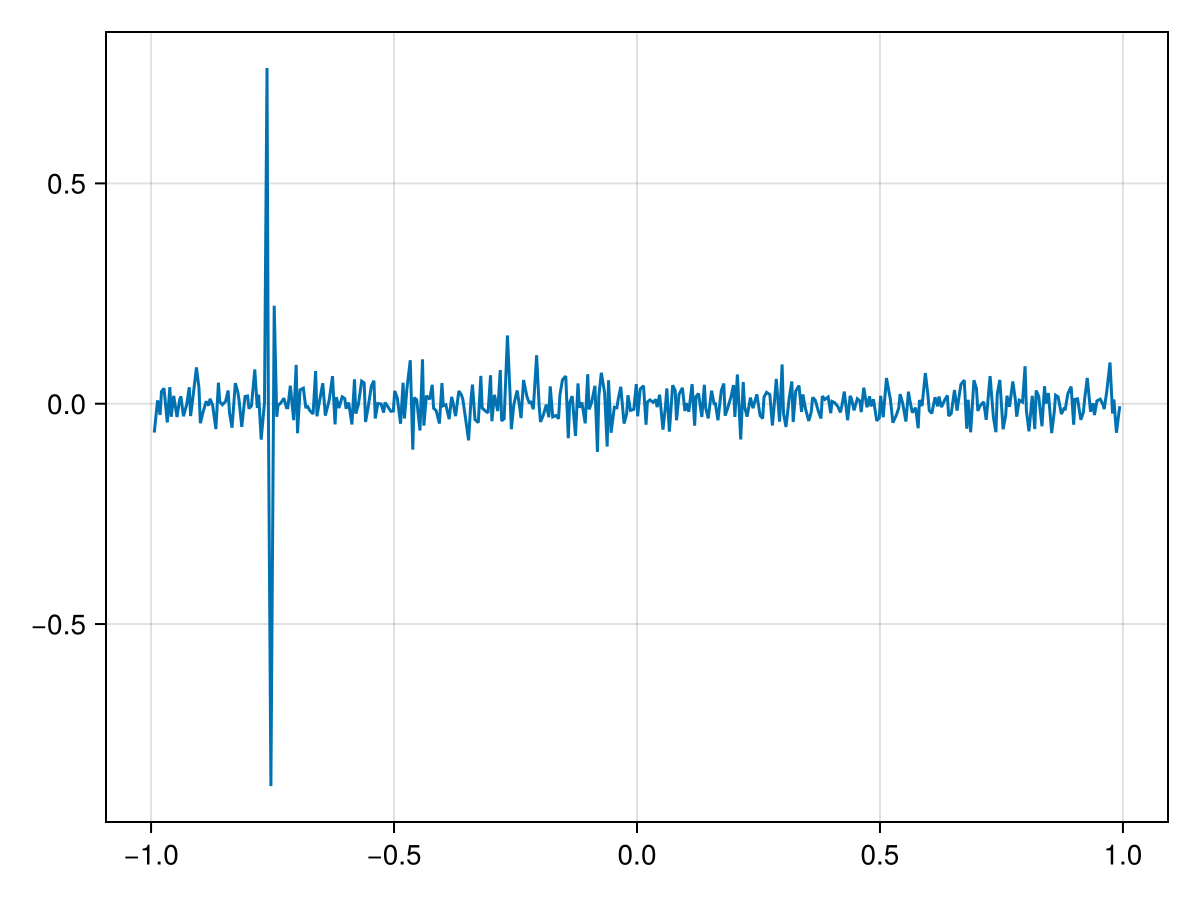

In [267]:
fig = Figure()
ax = Axis(fig[1,1])

# lines!(ax, xgrid, data.xt[:,1])
lines!(ax, xs, PA*data.xt[:,100])

fig

Define ObsConstraintSystem

In [268]:
idx = 4

## Selecion of hyper-prior parameters
# power parameter
r_range = [ 1.0, .5, -.5, -1.0 ]; 
r = r_range[idx] # select parameter 
# shape parameter
β_range = [ 1.501, 3.0918, 2.0165, 1.0017 ]; 
β = β_range[idx] # shape parameter
# rate parameters 
ϑ_range = [ 5*10^(-2), 5.9323*10^(-3), 1.2583*10^(-3), 1.2308*10^(-4) ]; 
ϑ = ϑ_range[idx]

# r = -0.5
# β = 0.5
# ϑ = 0.01
dist = GeneralizedGamma(r, β, ϑ);

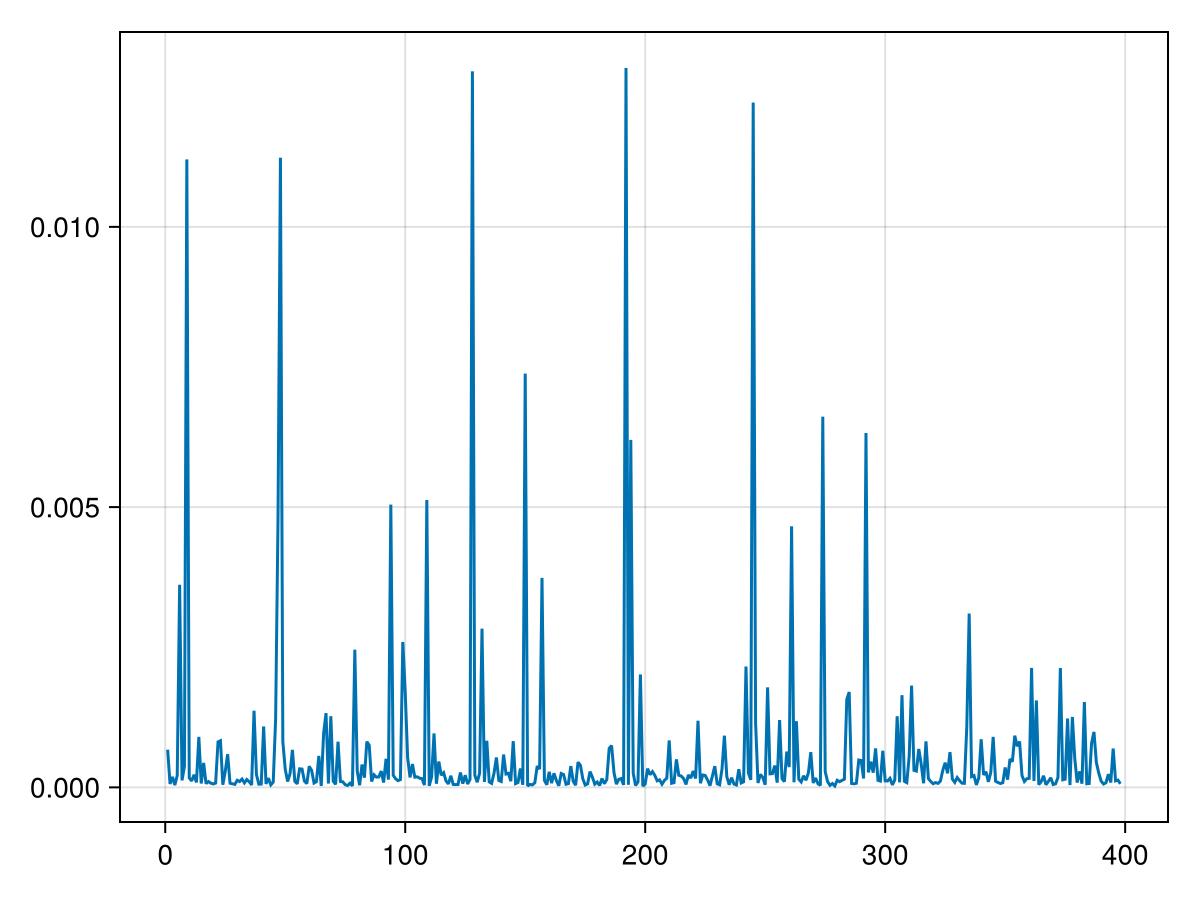

In [269]:
fig = Figure()

lines(rand(dist, Ns))

Create initial ensemble

In [270]:
Ne = 40
X = zeros(model.Ny + model.Nx, Ne)

for i=1:Ne
    regenerate!(f0)
    X[Ny+1:Ny+Nx,i] = f0.(xgrid)#initial_condition(αk, Δx, Nx)
end

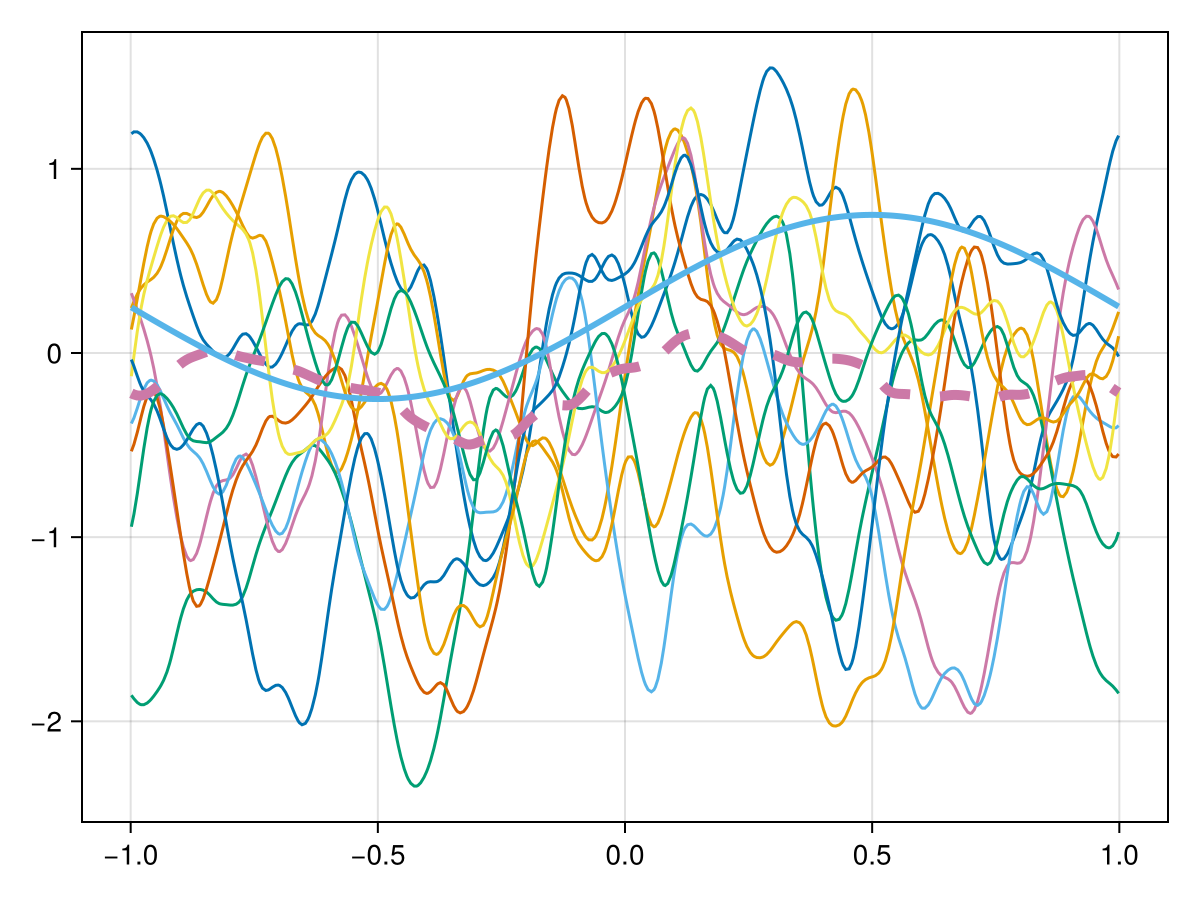

In [271]:
fig = Figure()

ax = Axis(fig[1,1])

for i=1:10
    lines!(ax, xgrid, X[Ny+1:Ny+Nx,i])
end
lines!(xgrid, mean(X[Ny+1:Ny+Nx,:]; dims = 2)[:,1], linewidth = 5, linestyle = :dash)

lines!(ax, xgrid, x0, linewidth = 3)

fig

Define initial guess

In [272]:
θinit = rand(dist, Ns);

Define linear maps and ObsConstraintSystem

In [273]:
Cθ = LinearMap(Diagonal(deepcopy(θinit)))
Cϵ = LinearMap(ϵy.Σ)
CX = LinearMap(Diagonal(1.0 .+ rand(Nx)))
sys_ys = ObsConstraintSystem(H, S, Cθ, Cϵ, CX)

ObsConstraintSystem(400, 20, 398, 20×400 LinearMaps.WrappedMap{Float64} of
  20×400 SparseMatrixCSC{Float64, Int64} with 20 stored entries, 398×400 LinearMaps.FunctionMap{Float64,true}(#15, #16; issymmetric=false, ishermitian=false, isposdef=false), 398×398 LinearMaps.WrappedMap{Float64} of
  398×398 Diagonal{Float64, Vector{Float64}}, 20×20 LinearMaps.WrappedMap{Float64} of
  20×20 Diagonal{Float64, Vector{Float64}}, LinearMap[400×400 LinearMaps.WrappedMap{Float64} of
  400×400 Diagonal{Float64, Vector{Float64}}])

In [274]:
sys_y = ObsSystem(H, Cϵ, CX)

ObsSystem(400, 20, 20×400 LinearMaps.WrappedMap{Float64} of
  20×400 SparseMatrixCSC{Float64, Int64} with 20 stored entries, 20×20 LinearMaps.WrappedMap{Float64} of
  20×20 Diagonal{Float64, Vector{Float64}}, LinearMap[400×400 LinearMaps.WrappedMap{Float64} of
  400×400 Diagonal{Float64, Vector{Float64}}])

In [275]:
yidx = 1:Δ:Nx
idx = vcat(collect(1:length(yidx))', collect(yidx)')

# @assert length(yidx) == Ny

# # Create Localization structure
Gxx(i,j) = periodicmetric!(i,j, Nx)
Gxy(i,j) = periodicmetric!(i,yidx[j], Nx)
Gyy(i,j) = periodicmetric!(yidx[i],yidx[j], Nx)

Lrad = 5
Loc = Localization(Lrad, Gxx, Gxy, Gxx)

Localization(5.0, Gxx, Gxy, Gxx)

In [276]:
β = 1.01
ϵxβ = MultiAddInflation(Nx, β, zeros(Nx), σx)

MultiAddInflation(400, 1.01, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0001 0.0 … 0.0 0.0; 0.0 0.0001 … 0.0 0.0; … ; 0.0 0.0 … 0.0001 0.0; 0.0 0.0 … 0.0 0.0001], [0.01 0.0 … 0.0 0.0; 0.0 0.01 … 0.0 0.0; … ; 0.0 0.0 … 0.01 0.0; 0.0 0.0 … 0.0 0.01])

Define EnKF

In [277]:
enkf = EnKF(Ne, ϵy, sys_y, Δtdyn, Δtobs)

Matrix-free implementation of the ensemble Kalman filter with filtered = false


Define localized EnKF

In [278]:
locenkf = LocEnKF(Ne, ϵy, sys_y, Loc, Δtdyn, Δtobs)

Localized ensemble Kalman filter with filtered = false


Define hierarchical EnKF

In [279]:
henkf = HEnKF(Ne, ϵy, sys_ys, dist, deepcopy(θinit), Δtdyn, Δtobs)

Hierarchical ensemble Kalman filter with filtered = false


Define hierarchical and localized EnKF

In [280]:
hlocenkf = HLocEnKF(Ne, ϵy, sys_ys, Loc, dist, deepcopy(θinit), Δtdyn, Δtobs)

Hierarchical localized ensemble Kalman filter with filtered = false


In [281]:
X_enkf = seqassim_trixi(data, Tf, ϵxβ, enkf, deepcopy(X), model.Ny, model.Nx, t0, sys_burgers);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:09


In [282]:
X_locenkf = seqassim_trixi(data, Tf, ϵxβ, locenkf, deepcopy(X), model.Ny, model.Nx, t0, sys_burgers);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:11


In [243]:
X_henkf, θ_henkf = seqassim_trixi(data, Tf, ϵxβ, henkf, deepcopy(X), model.Ny, model.Nx, t0, sys_burgers);

Progress:   4%|█▋                                       |  ETA: 0:09:00

LoadError: InterruptException:

In [283]:
X_hlocenkf, θ_hlocenkf = seqassim_trixi(data, Tf, ϵxβ, hlocenkf, deepcopy(X), model.Ny, model.Nx, t0, sys_burgers);

Progress: 100%|█████████████████████████████████████████| Time: 0:02:58


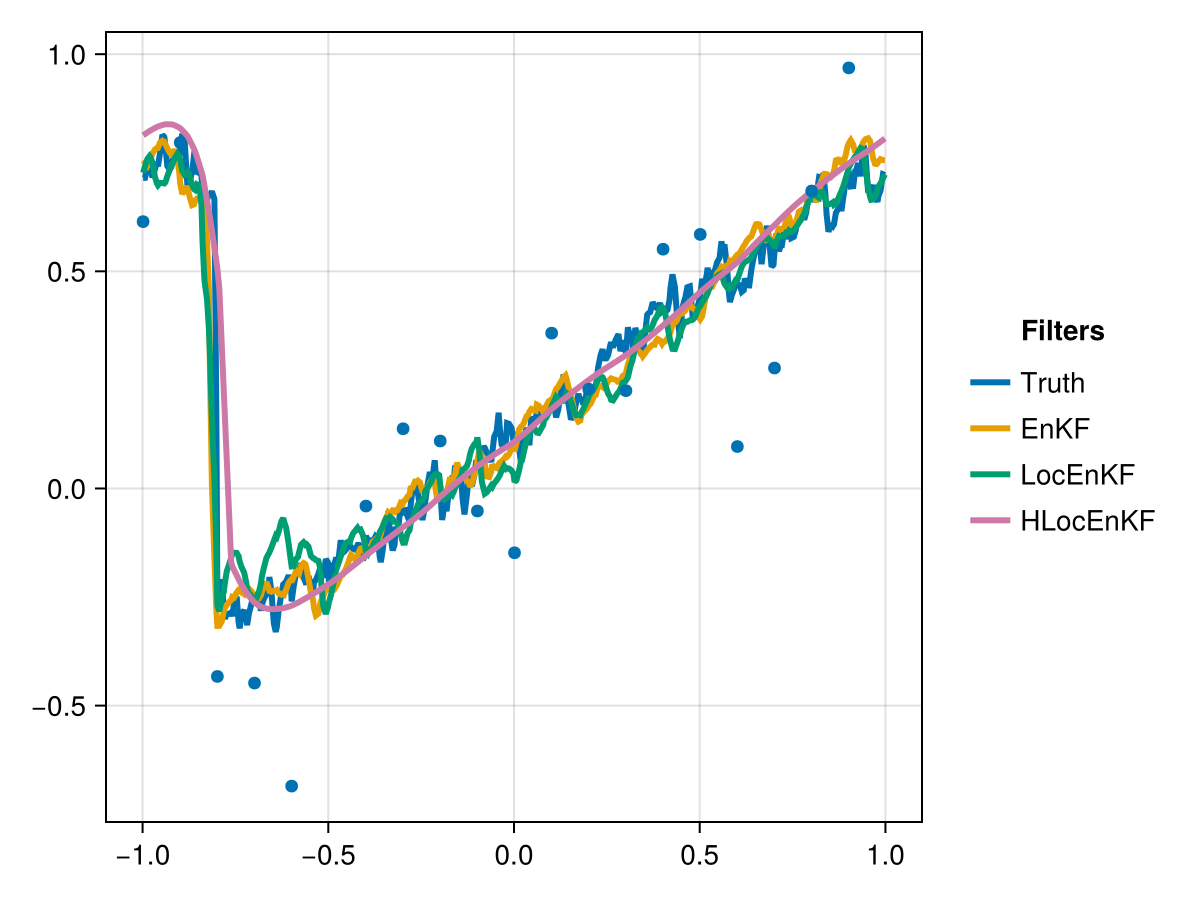

In [286]:
fig = Figure()

ax = Axis(fig[1,1])

tsnap = 80
idx = 10

lines!(ax, xgrid, data.xt[:,tsnap], linewidth = 3, label = "Truth")

# lines!(ax, xgrid, X[Ny+1:Ny+Nx,2])
# lines!(ax, xgrid, X_enkf[tsnap+1][:,idx], linewidth = 3, label = "EnKF")
lines!(ax, xgrid, mean(X_enkf[tsnap+1]; dims = 2)[:,1], linewidth = 3, label = "EnKF")

# lines!(ax, xgrid, X_locenkf[tsnap+1][:,idx], linewidth = 3, label = "LocEnKF")
lines!(ax, xgrid, mean(X_locenkf[tsnap+1]; dims = 2)[:,1], linewidth = 3, label = "LocEnKF")


# lines!(ax, xgrid, X_henkf[tsnap+1][:,2], linewidth = 3, label = "HEnKF")
# lines!(ax, xgrid, X_henkf[tsnap+1][:,2])
# lines!(ax, xgrid, mean(X_henkf[tsnap+1]; dims = 2)[:,1], linewidth = 3, label = "HEnKF")

# lines!(ax, xgrid, X_hlocenkf[tsnap+1][:,idx], linewidth = 3, label = "HLocEnKF")
lines!(ax, xgrid, mean(X_hlocenkf[tsnap+1]; dims = 2)[:,1], linewidth = 3, label = "HLocEnKF")

# ax2 = Axis(fig[1,2])

fig[1, 2] = Legend(fig, ax, "Filters", framevisible = false)

# lines!(ax, xgrid[1:2:end], data.yt[:,tsnap], linewidth = 3)


scatter!(ax, xgrid[1:Δ:end], data.yt[:,tsnap])
# lines!(ax, xs, PA.P*X_enkf[tsnap+1][:,2])


fig

In [287]:
std(X_hlocenkf[end]; dims = 2)

400×1 Matrix{Float64}:
 0.0051602078064541005
 0.00476635345099285
 0.004306913337126275
 0.004005812819122433
 0.0038664002650790797
 0.0036358722594302287
 0.0034163368672746
 0.003317015123210685
 0.0032830236874875993
 0.003203200414613197
 0.003151313647624295
 0.0031542023910657636
 0.003161050437037044
 ⋮
 0.00288398142616271
 0.0028053907705727914
 0.0027316218825310587
 0.0027138671073030133
 0.0027141547528910064
 0.002701082501543171
 0.002786591293592726
 0.002938518242279371
 0.0030475835099047694
 0.003306972658883895
 0.003746691498526465
 0.004142311149724143

In [288]:
std(X_locenkf[end]; dims = 2)

400×1 Matrix{Float64}:
 0.049532650943008454
 0.04779702677029536
 0.04244401362412497
 0.03874206003608656
 0.04060004359243229
 0.03874895425555365
 0.041578469617810455
 0.048758705907632205
 0.05037551727540151
 0.04108417110971921
 0.04753682861595251
 0.058516990119010515
 0.062084567896175925
 ⋮
 0.06519363266873589
 0.05652685783011606
 0.057456355397137684
 0.058304486745210785
 0.060096323073930355
 0.05812849553076238
 0.05707195678012013
 0.0669350231139856
 0.06274588737843736
 0.04890798131431752
 0.04191152823449182
 0.04821593493715997

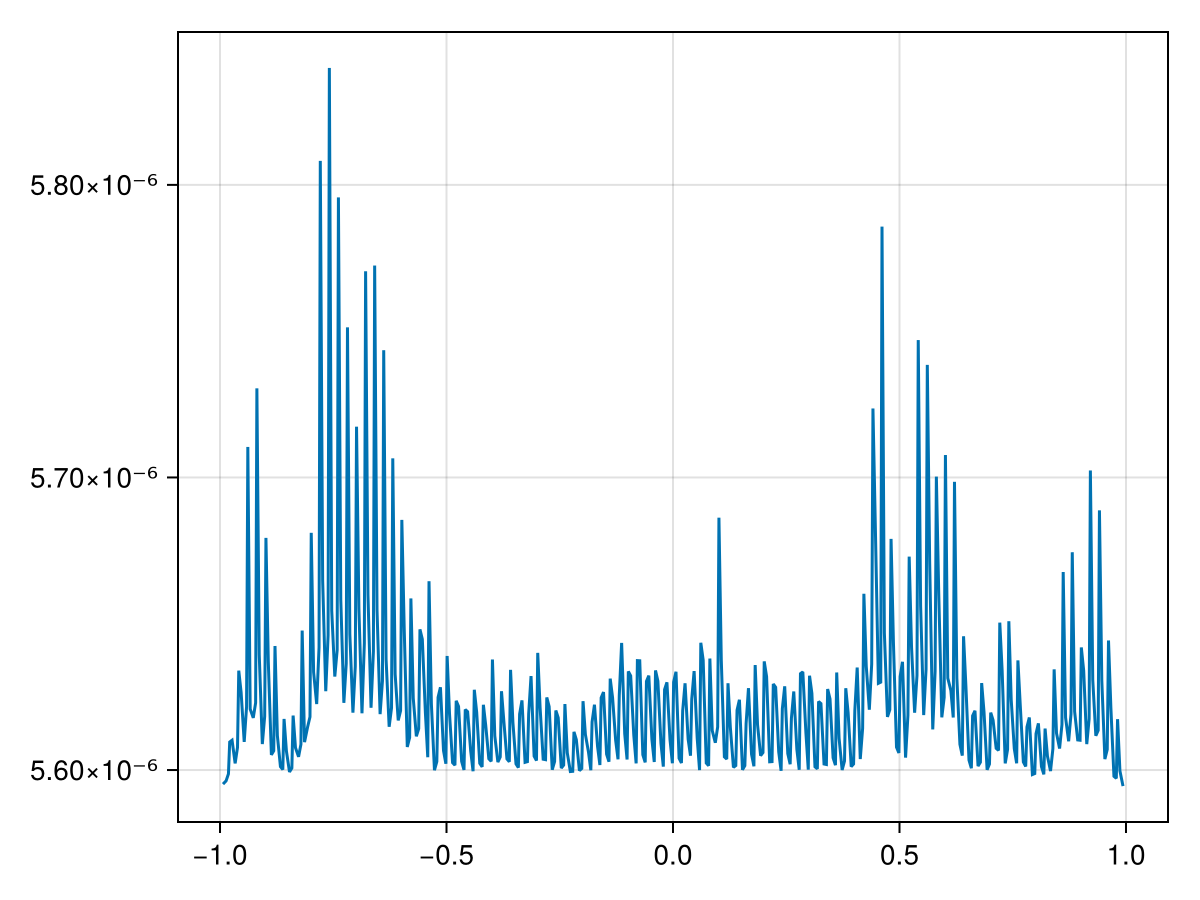

In [289]:
fig = Figure()

ax = Axis(fig[1,1])

tsnap = 20

# lines!(ax, xs, θ_henkf[tsnap])
lines!(ax, xs, θ_hlocenkf[tsnap])


fig